In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService
import math
import pickle

# Load your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

## Initialize the qubit to be teleported

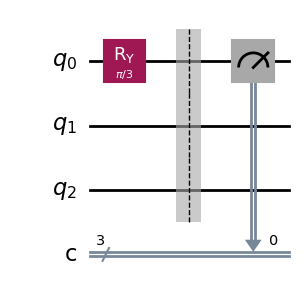

In [2]:
qc_init = QuantumCircuit(3, 3)
qc_init.ry(math.pi/3, 0)
qc_init.barrier()
qc_init.measure(0, 0) # Measure the initial state of the qubit
qc_init.draw('mpl')

## Measure the initial state of qubit to be teleported

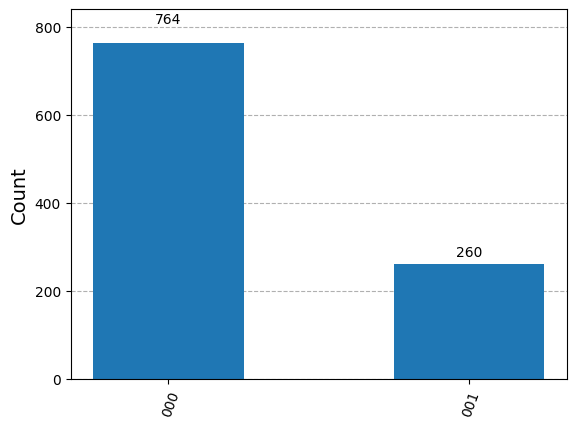

In [3]:
# Run on the qasm simulator
simulator = AerSimulator()
circ = transpile(qc_init, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

# Print and plot results
plot_histogram(counts).savefig('results/quantum_tele_init_ideal.jpg')
plot_histogram(counts)

## Construct the full circuit for the teleportation

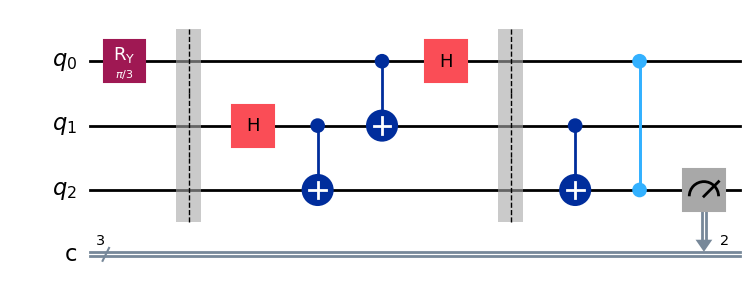

In [4]:
qc = QuantumCircuit(3, 3)
qc.ry(math.pi/3, 0)
qc.barrier()
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.cx(1, 2)
qc.cz(0, 2)
qc.measure(2, 2)
qc.draw('mpl').savefig('results/quantum_tele_circuit.jpg')
qc.draw('mpl')


## Teleportation result (simulated backend without noise)

{'100': 1039, '000': 3057}


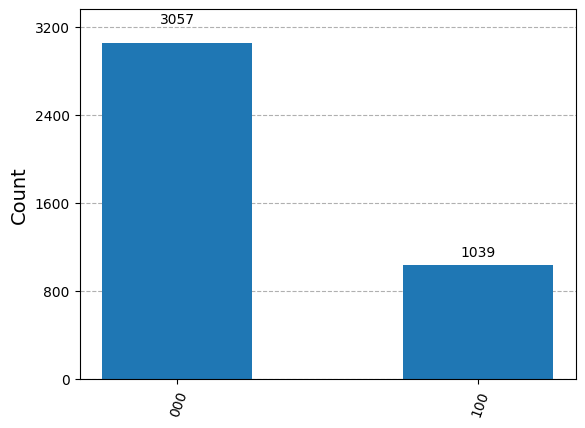

In [5]:
# Run on the qasm simulator
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ, shots = 4096).result()
counts = result.get_counts(circ)

# Print and plot results
print(counts)
plot_histogram(counts).savefig('results/quantum_tele_ideal.jpg')
plot_histogram(counts)

## Teleportation result (local simulated backend with noise model)

{'100': 1098, '000': 2998}


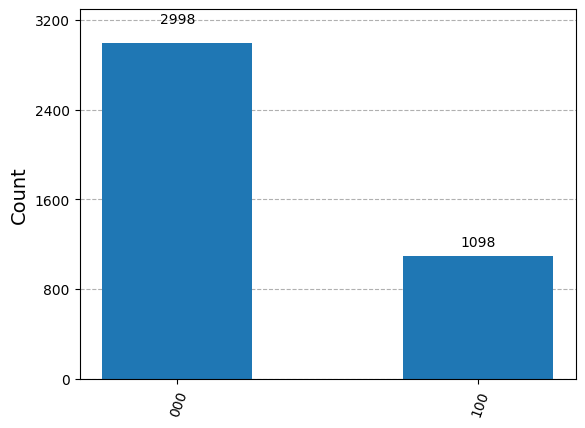

In [6]:
# Simulate a noisy backend, based on a cloud backend
backend = service.backend("ibm_sherbrooke")
sim_sherbrooke = AerSimulator.from_backend(backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_sherbrooke)

# Execute the circuit on the simulated noisy backend and plot results
result_noise = sim_sherbrooke.run(tcirc, shots = 4096).result()
counts_noise = result_noise.get_counts(0)
print(counts_noise)
plot_histogram(counts_noise).savefig('results/quantum_tele_noise_local.jpg')
plot_histogram(counts_noise)

## Teleportation result (actual quantum hardware)

In [7]:
# Transpile the circuit for the selected backend
backend_name = "ibm_sherbrooke"
backend = service.backend(backend_name)  # Example using a simulator
transpiled_circuit = transpile(qc, backend)

# Execute the circuit
job = backend.run(transpiled_circuit, shots = 4096)

# Save the job ID
job_id = job.job_id()

print(f"Job (ID: {job_id}) sent successfully to backend {backend_name}.")
print("Come back after a few hours and retrieve the results with the cell below.")

C:\Users\Sadim\AppData\Local\Temp\ipykernel_4500\129472262.py:7: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_circuit, shots = 4096)
c:\Users\Sadim\miniconda3\envs\new_qiskit_one\lib\site-packages\qiskit_ibm_runtime\ibm_backend.py:721: UserWarning: The backend ibm_sherbrooke is currently paused.
  warnings.warn(f"The backend {self.name} is currently paused.")


Job (ID: cvs6ge1xx5ag008hbc8g) sent successfully to backend ibm_sherbrooke.
Come back after a few hours and retrieve the results with the cell below.


### Retrieve job result from the cloud, based on job ID

Results:
{'100': 1130, '000': 2870}


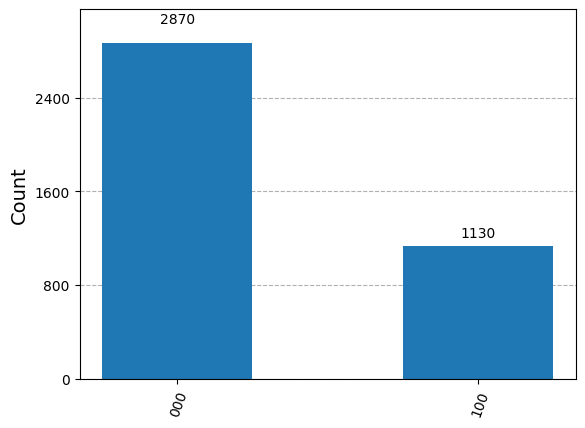

In [10]:
# Monitor the job status on IQP, and run this cell when the sent job has been completed

# Reload the service object, in case the nb starts up fresh
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum")

# Retrieve the job result based on its ID
retrieved_job = service.job('cvpdz1cxx5ag008h5cmg') # Put the job ID from the above cell here
job_result = retrieved_job.result()

# Print and plot results
print("Results:")
counts_cloud = job_result.get_counts()
print(counts_cloud)
plot_histogram(counts_cloud).savefig("results/quantum_tele_noise_sherbrooke.jpg")
plot_histogram(counts_cloud)